<a href="https://colab.research.google.com/github/naminda/hello-world/blob/master/Copy_of_MLFoundations_B3_Quiz_01_naminda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Bank Marketing Data Set
Source: UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]

# Student Name: Naminda Jayawardana
# Date : 12/06/2022

# Assignment Instructions
* You will be given 12 tasks to complete the code cells.
* Provide your code ONLY in between hash (#) lines.
* Do not add or moidfy code outside the hash (#) lines
* In some tasks, you may find place holders (<<?>>) to replace by a expression/variable/function to complete the code.
* Example answer is provided for some tasks

### Example:
Task 0: create variable nameed `a` and assign value `3.14`. Then print the value of `a`.

```python
#create variable nameed a and assign value 3.14. Then print the value of a.
###############################
a = 3.14
print(a)
###############################
```



## 1. Load Python Modules

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Acquire Data to Work

* Task 1: Load CSV File from the above URL into Pandas DataFrame.

In [61]:
file_name = 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/bank_marketing_dataset.csv'

# Task 1: Complete the code below to load CSV File from the above URL into Pandas DataFrame
# Hint: Fill <<1>> with the appropriate function name
#############################################################


data = pd.read_csv(file_name, sep=',')
 
#############################################################

data.sample(5)

,age,job_type,marital_status,education,has_credit_in_default,average_yearly_balance,has_housing_loan,has_personal_loan,contact_type,last_contact_day,last_contact_month,last_contact_duration,number_of_contacts,days_since_previous_campaign_contact,previous_campaign_contacts,previous_campaign_outcome,is_subscribed
37688,33.0,blue-collar,married,secondary,no,705,yes,no,cellular,14,may,112,2,-1.0,0.0,unknown,no
21894,39.0,management,married,tertiary,no,5060,yes,no,cellular,20,aug,157,4,-1.0,0.0,unknown,no
18080,32.0,services,married,secondary,no,-31,no,yes,telephone,30,jul,96,6,-1.0,0.0,unknown,no
25083,39.0,blue-collar,married,primary,no,111,no,no,cellular,18,nov,201,2,-1.0,0.0,unknown,no
44668,32.0,services,single,tertiary,no,620,no,no,cellular,3,sep,110,6,95.0,5.0,other,no


* Task 2: Find how many rows and columns this dataset. Use print stament display the value. 
> image.png

In [3]:
# Task 2: Complete the code below to print number of rows and columns.
#############################################################
rows=len(data.axes[0])
columns=len(data.axes[1])

#############################################################

print(F"rows = {rows}, columns={columns}")

rows = 45211, columns=17


In [52]:
data['days_since_previous_campaign_contact'].isna()
data.loc[data['days_since_previous_campaign_contact'].isna()]

,age,job_type,marital_status,education,has_credit_in_default,average_yearly_balance,has_housing_loan,has_personal_loan,contact_type,last_contact_day,...,"avg_yearly_balance_bin_(1000.0, 5000.0]","avg_yearly_balance_bin_(5000.0, inf]","age_bin_(0.0, 30.0]","age_bin_(30.0, 45.0]","age_bin_(45.0, 60.0]","age_bin_(60.0, inf]","number_of_contacts_bin_(0.0, 1.0]","number_of_contacts_bin_(1.0, 2.0]","number_of_contacts_bin_(2.0, 5.0]","number_of_contacts_bin_(5.0, inf]"


* Task 3: Get Column Datails

In [53]:
# Task 3.1: Type your code below to display column names, data types and non null value counts as a table.
# Note the columns with missing values.
#############################################################

data.info()
#############################################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 42014 to 24060
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   age                                      20000 non-null  float64 
 1   job_type                                 20000 non-null  object  
 2   marital_status                           20000 non-null  object  
 3   education                                20000 non-null  object  
 4   has_credit_in_default                    20000 non-null  int64   
 5   average_yearly_balance                   20000 non-null  int64   
 6   has_housing_loan                         20000 non-null  int64   
 7   has_personal_loan                        20000 non-null  int64   
 8   contact_type                             20000 non-null  object  
 9   last_contact_day                         20000 non-null  int64   
 10  last_contact_month            

In [6]:
# Task 3.2: Replace the missing values of the columns you identified
# Hint 1: 'days_since_previous_campaign_contact' should be -1 when no previous campaign contacts were made.
# Hint 2: 'previous_campaign_contacts' should be 0 if no previous campaign contacts were made.
# Hint 3: Ignore any missing value of 'age' column. We will work on that below.
# Hint 4: Use fillna()
#############################################################
 
data['days_since_previous_campaign_contact']=data['days_since_previous_campaign_contact'].fillna(-1)
data['previous_campaign_contacts']=data['previous_campaign_contacts'].fillna(0)


#############################################################

In [ ]:
data['days_since_previous_campaign_contact'].isna()
data.loc[data['days_since_previous_campaign_contact'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   45210 non-null  float64
 1   job_type                              45211 non-null  object 
 2   marital_status                        45211 non-null  object 
 3   education                             45211 non-null  object 
 4   has_credit_in_default                 45211 non-null  object 
 5   average_yearly_balance                45211 non-null  int64  
 6   has_housing_loan                      45211 non-null  object 
 7   has_personal_loan                     45211 non-null  object 
 8   contact_type                          45211 non-null  object 
 9   last_contact_day                      45211 non-null  int64  
 10  last_contact_month                    45211 non-null  object 
 11  last_contact_du

## 4. Descriptive Statistics
 



* Task 4: Find and display min, max, mean, median and standard deviation of the column `legs`. You may choose from different methods to do this task. below is the output from one method.
> 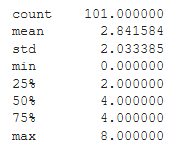

In [7]:
# Task 4: Type your code below to find and display min, max, mean, median and standard deviation of the numeric columns.
# Hint 1: Use percentiles list [0.05, 0.1, 0.25, 0.5, 0.7, 0.9, 0.95] in <<2>> to get custom percentile columns
# Hint 2: Replace <<1>> by appropriate function
#############################################################
 
data.describe(include='all').transpose()
data.describe(percentiles=[.05, .1, .25, .5, .75, .9, .95]).transpose()
 
#############################################################


,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
age,45210.0,40.947733,10.927918,18.0,27.0,29.0,33.0,39.0,48.0,56.0,59.0,590.0
average_yearly_balance,45211.0,1362.272058,3044.765829,-8019.0,-172.0,0.0,72.0,448.0,1428.0,3574.0,5768.0,102127.0
last_contact_day,45211.0,15.806419,8.322476,1.0,3.0,5.0,8.0,16.0,21.0,28.0,29.0,31.0
last_contact_duration,45211.0,258.163080,257.527812,0.0,35.0,58.0,103.0,180.0,319.0,548.0,751.0,4918.0
number_of_contacts,45211.0,2.763841,3.098021,1.0,1.0,1.0,1.0,2.0,3.0,5.0,8.0,63.0
days_since_previous_campaign_contact,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,185.0,317.0,871.0
previous_campaign_contacts,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,275.0


* Task 5 : Create a boxplot to visualize the deatils you found in Task 3.




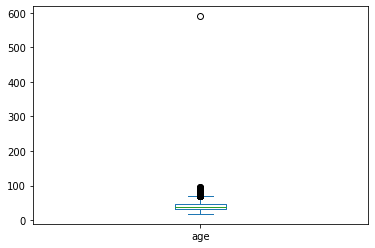

In [8]:
# Task 5.1: Type your code to create a box plot using the columns 'age'
#############################################################
data['age'].plot(kind='box')
#############################################################

In [9]:
# Task 5.2: Remove outlier records based on the 'age' column
# Hint: Drop entire row containing outlier value for 'age'
#############################################################
 data.drop
#############################################################

IndentationError: ignored

data.drop(labels='age', axis=1, inplace = True)

In [10]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45210.0,NaN,NaN,NaN,40.947733,10.927918,18.0,33.0,39.0,48.0,590.0
job_type,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,6,secondary,23201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_credit_in_default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_yearly_balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
has_housing_loan,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_personal_loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact_type,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_contact_day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


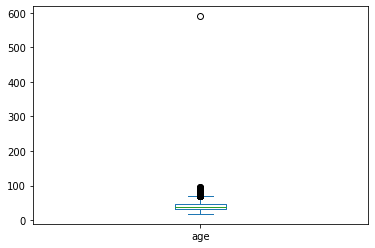

In [11]:
# Task 5.3: Produce Box Plot after removing outliers
#############################################################
data['age'].plot(kind='box')
#############################################################

In [12]:
# Task 5.4: Get Descriptive Statistics for 'age' column only
#############################################################
data['age'].describe()
#############################################################

count    45210.000000
mean        40.947733
std         10.927918
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max        590.000000
Name: age, dtype: float64

Task 6: Get Age distribution by 'job_type'



data.groupby(by='job_type').agg({'age':'median'})

In [13]:
# Task 6.1: Find the median age by the the column 'job_type'
# Hint: Use group by
#############################################################
data.groupby(by='job_type').agg({'age':'median'})
 
#############################################################

,age
job_type,
admin.,38.0
blue-collar,39.0
entrepreneur,41.0
housemaid,47.0
management,38.0
retired,59.0
self-employed,39.0
services,37.0
student,26.0


In [14]:
# Task 6.2: Replace any missing value of the 'age' column by the median age for the 'job_type'
# Hint: Use loc to isolate 'age' cells and isna() function to locate rows with missing values
#############################################################
data.loc[<<?>>, 'age']=<<?>>
 
#############################################################

SyntaxError: ignored

* Task 6: Understanding Categorical Columns

In [15]:
# Task 6.1: Get descriptive statistics for the column 'education'
#############################################################
data['education'].describe()
#############################################################

count         45211
unique            6
top       secondary
freq          23201
Name: education, dtype: object

In [16]:
# Task 6.2: Get display freqeuncy table for the column 'education' 
# get row count for each category in the column 'education' 
#############################################################
edu_values = data['education'].value_counts()
edu_values
#############################################################
print(edu_values)

secondary    23201
tertiary     13300
primary       6851
unknown       1857
tertiory         1
seconda**        1
Name: education, dtype: int64


In [17]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary', 'tertiory',
       'seconda**'], dtype=object)

In [18]:
# Task 6.3: If you notice any data issue in category labeling such as potential typo, correct those in the dataset. 
# Hint 1: Use replace or loc[] to replace the incorrect values with correct ones.
# Hint 2: You should see two issues
#############################################################
data['education'].replace('seconda**', 'secondary', inplace=True)
data['education'].replace('tertiory', 'tertiary', inplace=True)
#############################################################

In [19]:
# Task 6.4: Get row count for each category in the column 'education'
# Hint: Resuse what you did in 6.2 and verify the corrections being applied
#############################################################
edu_values = data['education'].value_counts()
edu_values
#############################################################
print(edu_values)

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


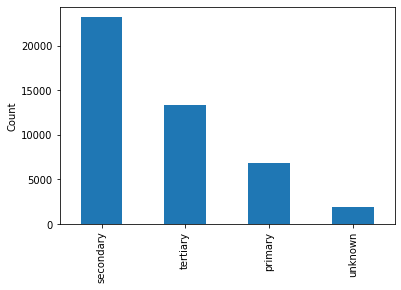

In [20]:
# Task 6.4: Complete the code below <<?>>  to create bar plot for 'education' category column
#############################################################
edu_values.plot(kind='bar', ylabel='Count')
#############################################################

In [21]:
# Task 6.5: Complete the code below to get unique values in the column 'is_subscribed' 
#############################################################
subsc_unique = data['is_subscribed'].unique()
#############################################################
print(subsc_unique)

['no' 'no.' 'yes' 'NO' 'yes.']


In [22]:
# Task 6.6: Complete the code below to display freqeuncy table for the column 'is_subscribed' 
# get row count for each category in the column 'education' 
#############################################################
subsc_value_counts = data['is_subscribed'].value_counts()
 
#############################################################
print(subsc_value_counts)

no      39918
yes      5285
yes.        4
no.         3
NO          1
Name: is_subscribed, dtype: int64


In [23]:
# Task 6.7: It can take onlt tw values for 'is_subscribed' column {'yes', 'no'}
# Hint: Use replace or loc
#############################################################
data['is_subscribed'].replace('no.', 'no', inplace=True)
data['is_subscribed'].replace('yes.', 'yes', inplace=True)
data['is_subscribed'].replace('NO', 'no', inplace=True)
#############################################################


In [24]:
# Task 6.8: Repeat what you did in Task 6.6 to verify the changes being appplied to teh dataset
# get row count for each category in the column 'education' 
#############################################################
subsc_value_counts = data['is_subscribed'].value_counts()
#############################################################
print(subsc_value_counts)

no     39922
yes     5289
Name: is_subscribed, dtype: int64


In [25]:
# Task 6.2: Get display freqeuncy table for the column 'job_type' 
# get row count for each category in the column 'job_type' 
#############################################################
job_value_counts = data['job_type'].value_counts()
#############################################################
print(job_value_counts)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job_type, dtype: int64


In [26]:
# Task 6.3: If you notice any data issue in category labeling such as potential typo, correct those in the dataset. 
# Hint 1: Use replace or loc[] to replace the incorrect values with correct ones.
# Hint 2: You should see two issues
#############################################################
data['job_type'].<<?>>
#############################################################
data['job_type'].value_counts()

SyntaxError: ignored

In [27]:
# Execute the code below to verify your value replacement worked.

data['job_type'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job_type, dtype: int64

Task 7: Quering Data

In [28]:
# Task 7.1: Display rows where 'average_yearly_balance' greater than 80,000
# Hint: Use query() function
#############################################################
avg_yearly_balance_80k = data.query("average_yearly_balance>80000")
avg_yearly_balance_80k.head()
#############################################################

,age,job_type,marital_status,education,has_credit_in_default,average_yearly_balance,has_housing_loan,has_personal_loan,contact_type,last_contact_day,last_contact_month,last_contact_duration,number_of_contacts,days_since_previous_campaign_contact,previous_campaign_contacts,previous_campaign_outcome,is_subscribed
26227,59.0,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1.0,0.0,unknown,no
39989,51.0,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1.0,0.0,unknown,no
42558,84.0,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313.0,2.0,other,yes
43393,84.0,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94.0,3.0,success,yes


In [29]:
# Task 7.1: Count rows rows where 'average_yearly_balance' is negative (<0) and 'has_credit_in_default' is 'yes'
# Hint: use shape attribute to get the row count of the result set
#############################################################
negative_bal_w_default_count = data.query("average_yearly_balance<0" & "has_credit_in_default='yes'")
#############################################################
print(negative_bal_w_default_count)

TypeError: ignored

Task 8: Encoding

In [58]:
# Task 8.1 Encode the columns 'has_credit_in_default',	'has_housing_loan', 	'has_personal_loan' and 'is_subscribed' with the condition below
# 'yes' -> 1
# 'no' -> 0
# Hint 1: You can use np.where()
# Hint 2: You can apply this encoding one column at a time
#############################################################
data['has_credit_in_default'] = np.where(data['has_credit_in_default']=='yes', 1, 0) 
data['has_housing_loan'] = np.where(data['has_housing_loan']=='yes', 1, 0)
data['has_personal_loan'] = np.where(data['has_personal_loan']=='yes', 1, 0)
data['is_subscribed'] = np.where(data['is_subscribed']=='yes', 1, 0)
#############################################################

In [31]:
# Task 8.2 Convert column 'previous_campaign_contacted' to binary follwoing the condition below
# if previous_campaign_contacted > 1 then 1 
# if previous_campaign_contacted == 0 or None then 0
# Create a new column
#############################################################
data['previous_campaign_contact']=np.where(data['previous_campaign_contact']>'1', 1, 0)
#############################################################

KeyError: ignored

In [59]:
# Task 8.3 Get the descriptive statistics of the columns 'has_credit_in_default',	'has_housing_loan', 	'has_personal_loan', 'previous_campaign_contacted',  and 'is_subscribed'
#############################################################
data[['has_credit_in_default','has_housing_loan', 'has_personal_loan' , 'previous_campaign_contacted', 'is_subscribed' ]].describe()
#############################################################


KeyError: ignored

* Task 9: Binning

In [38]:
edges = [-np.inf, 0, 100, 500, 1000, 5000, np.inf]
# Task 9.1 complete the code below to convert numeric variable 'average_yearly_balance' to categorical variable using cut() function and list of edges above
#############################################################
data['avg_yearly_balance_bin'] = pd.cut(x=data['average_yearly_balance'], bins=edges) #labels=labels)


#############################################################

In [39]:
# Execute the code below to verify your encoding worked.
data['avg_yearly_balance_bin'].value_counts()

(1000.0, 5000.0]    11786
(100.0, 500.0]      11190
(-inf, 0.0]          7280
(500.0, 1000.0]      6915
(0.0, 100.0]         5195
(5000.0, inf]        2845
Name: avg_yearly_balance_bin, dtype: int64

In [40]:
edges = [0, 1, 2, 5, np.inf]
# Task 9.2 complete the code below to convert numeric variable 'number_of_contacts' to categorical variable using cut() function and list of edges above
#############################################################
data['number_of_contacts_bin'] = pd.cut(x=data['number_of_contacts'], bins=edges) #labels=labels)
#############################################################

In [41]:
# Execute the code below to verify your encoding worked.
data['number_of_contacts_bin'].value_counts()

(0.0, 1.0]    17544
(1.0, 2.0]    12505
(2.0, 5.0]    10807
(5.0, inf]     4355
Name: number_of_contacts_bin, dtype: int64

In [48]:
edges = [0, 30, 45, 60,  np.inf]
# Task 9.3 complete the code below to convert numeric variable 'age' to categorical variable using cut() function and list of edges above
#############################################################
data['age_bin'] = pd.cut(x=data['age'], bins=edges) #labels=labels)
#############################################################


In [49]:
# Execute the code below to verify your encoding worked.
data['age_bin'].value_counts()

(30.0, 45.0]    23733
(45.0, 60.0]    13258
(0.0, 30.0]      7030
(60.0, inf]      1189
Name: age_bin, dtype: int64

* One-hot encoding categorical variables

In [50]:
# Execute teh code below to create dummy variables from categorical columns
data = pd.concat([data, pd.get_dummies(data[['education', 'job_type', 'marital_status', 'contact_type', 
                                             'previous_campaign_outcome', 'avg_yearly_balance_bin', 'age_bin', 'number_of_contacts_bin']])], axis=1)

* Task 10: Get Corrrection Matrix

In [ ]:
# Task 10 Complete the code below to get correlation matrix for numeric columns in the lsit below (including the converted ones)
# Hint 1: replace <<1>> with corr_columns_list
# Hint 2: replace <<2>> with the appropriate function
corr_columns_list = ['age', 'job_type', 'marital_status', 'education', 'has_credit_in_default', 'has_housing_loan',
       'has_personal_loan',  'avg_yearly_balance_bin', 'number_of_contacts', 'is_subscribed']

#############################################################
data[<<?>>].<<?>>()
#############################################################

# 5. Building a Machine Learning model

* Sample Dataset to reduce imbalanceness

In [51]:
# Execute the code below to reduce imbalanceness.
data = data.query("is_subscribed==1").sample(5000).append(data.query("is_subscribed==0").sample(15000))

In [ ]:
model_columns_list = ['has_credit_in_default', 'has_housing_loan', 'has_personal_loan',
      'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown',
       'job_type_admin', 'job_type_blue-collar', 'job_type_entrepreneur',
       'job_type_housemaid', 'job_type_management', 'job_type_retired',
       'job_type_self-employed', 'job_type_services', 'job_type_student',
       'job_type_technician', 'job_type_unemployed', 'job_type_unknown',
       'marital_status_divorced', 'marital_status_married', 'marital_status_single', 
       'contact_type_cellular', 'contact_type_telephone', 'contact_type_unknown', 
       'previous_campaign_outcome_failure','previous_campaign_outcome_other', 'previous_campaign_outcome_success', 'previous_campaign_outcome_unknown', 
       'avg_yearly_balance_bin_(-inf, 0.0]', 'avg_yearly_balance_bin_(0.0, 100.0]',
       'avg_yearly_balance_bin_(100.0, 500.0]', 'avg_yearly_balance_bin_(500.0, 1000.0]',
       'avg_yearly_balance_bin_(1000.0, 5000.0]', 'avg_yearly_balance_bin_(5000.0, inf]', 
       'age_bin_(0.0, 30.0]', 'age_bin_(30.0, 45.0]', 'age_bin_(45.0, 60.0]', 'age_bin_(60.0, inf]',
       'number_of_contacts_bin_(0.0, 1.0]', 'number_of_contacts_bin_(1.0, 2.0]',
       'number_of_contacts_bin_(2.0, 5.0]', 'number_of_contacts_bin_(5.0, inf]', 'is_subscribed']

* Task 11: Identifying X Variables and y variable (target) then train-test split

In [ ]:
# Task 11.1: From teh columns in the list 'model_columns_list' above, identify indepenet (X) and dependent (y) variables and complete the code below. 
# Hint 1: You can type or copy the column names from the 'model_columns_list'.
# Hint 2 : Replace <<?>>
#############################################################
X_variables = [<<?>>]
      
y_variable = '<<?>>'
#############################################################

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

In [ ]:
# Task 11.2: Split dataset into training and testing using
# Hint 1: Replace <<1>> by the appropriate function name
# Hint 2: Replace  <<2>>, <<3>> by appropriate variables created in the task 11.1
#############################################################
from sklearn.model_selection import <<1>>
X_train, X_test, y_train, y_test = <<1>>(data[<<2>>], data[<<3>>], test_size=0.3, random_state=42)
#############################################################

print(F"X_train = {X_train.shape[0]}")
print(F"y_train = {len(y_train)}")
print(F"X_test = {X_test.shape[0]}")
print(F"y_test = {len(y_test)}")

In [ ]:
# Execute code below to display first five rows of the feature datset
X_train.head()

* Task 12:  Train Classification Model and predict

In [ ]:
# Task 12.1 Train model
# Hint 1: Replace <<1>> by the appropriate class name to create RandomForest model object
# Hint 2: Replace <<2>> by the appropriate function name 
#############################################################
from sklearn.tree import RandomForestClassifier
model = <<1>>(random_state=0, max_depth=5, min_samples_split=5)
model.<<2>>(X_train, y_train)
#############################################################

In [ ]:
# Execute teh code below to get class labels
class_labels = [str(c) for c in model.classes_]
class_labels 

In [ ]:
# Task 12.2 Make predictions
#############################################################
y_pred_prob = model.<<1>>(X_test)
y_pred = model.<<2>>(X_test)
#############################################################

In [ ]:
# Execute the code below to construct results dataframe
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

In [ ]:
# Task 12.3 Comlete teh code below to create confusion matrix using the results dataframe 'test_result' and the crosstab() function
# Hint: Replace <<1>> by the appropriate function
#############################################################
cfm = <<1>>(test_result['y_act'], test_result['y_pred'])
#############################################################
cfm

* Accuracy

In [ ]:
#############################################################
# Task 12.4: Compute accuracy 
# Hint: Fill <<1>> with the appropriate function
from sklearn import metrics
acuracy_tc = metrics.<<1>>(test_result['y_act'], test_result['y_pred']) 
#############################################################
acuracy_tc

* Feature Importance

In [ ]:
pd.DataFrame({'Feature': X_variables, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

<hr>
Last update 2022-06-11 by Sumudu Tennakoon